In [3]:
pip install pandas matplotlib seaborn plotly

ERROR: Operation cancelled by user


Missing Values:
 show_id            0
type               0
title              0
director        2518
cast             747
country          803
date_added         9
release_year       0
rating             4
duration           4
listed_in          1
description        1
dtype: int64


<ipython-input-5-03060f50f831>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


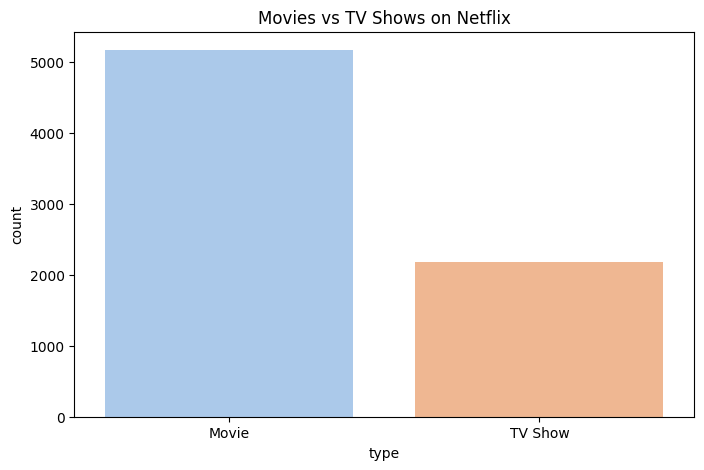

<ipython-input-5-03060f50f831>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


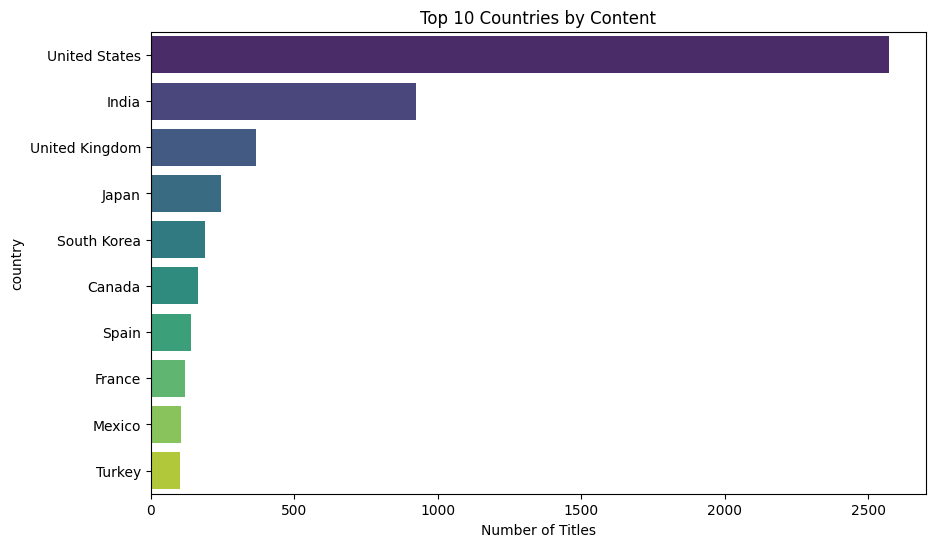

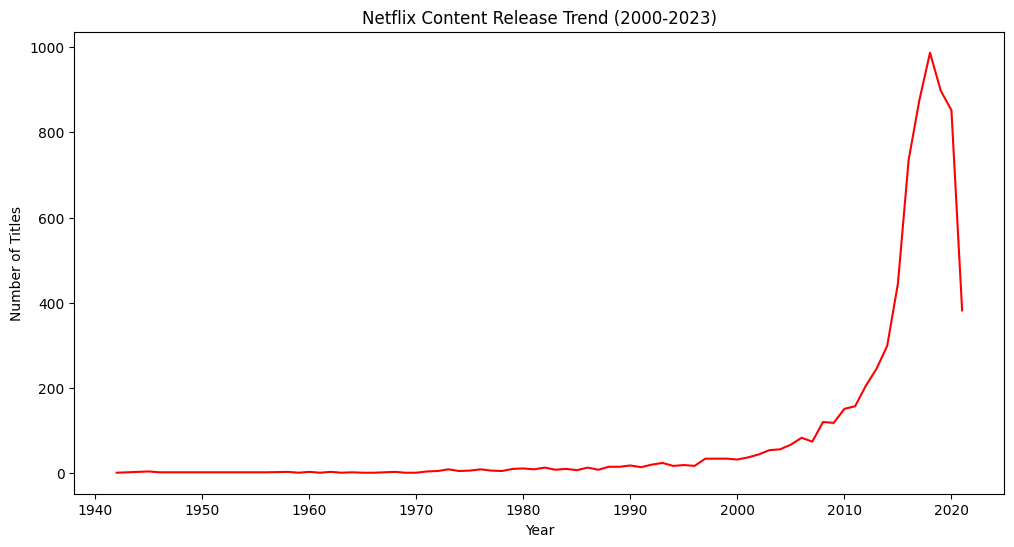

<ipython-input-5-03060f50f831>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='muted')


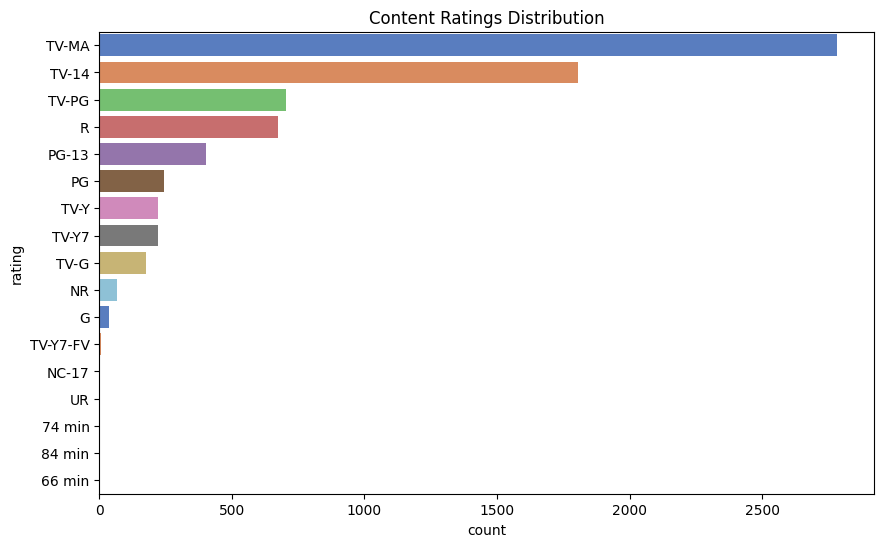

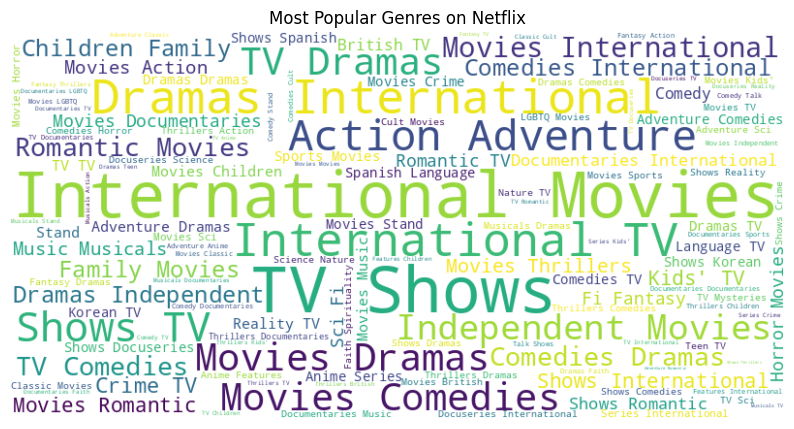

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (download from Kaggle)
df = pd.read_csv("netflix_titles.csv")

# --- Data Cleaning ---
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing 'country' (optional)
df = df.dropna(subset=['country'])

# Fill missing 'rating' with most common value
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# --- Exploratory Data Analysis (EDA) ---
# 1. Movies vs TV Shows distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, palette='pastel')
plt.title("Movies vs TV Shows on Netflix")
plt.show()

# 2. Top 10 Countries with most content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Content")
plt.xlabel("Number of Titles")
plt.show()

# 3. Release Trends (Movies per Year)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
yearly_trend = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, color='red')
plt.title("Netflix Content Release Trend (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

# 4. Most Common Ratings
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='muted')
plt.title("Content Ratings Distribution")
plt.show()

# 5. Word Cloud for Genres (Bonus)
from wordcloud import WordCloud

genres_text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Popular Genres on Netflix")
plt.show()

In [6]:
# Save cleaned data for Power BI
df.to_csv("netflix_cleaned.csv", index=False)